In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Analyze different time periods for RNN
for i in range(1023,1027):
    df = pd.read_csv(f'../output/runtest_{i}/overall_results.csv')
    print(f"Runtest_{i}",df.groupby("Metric")["Relative_MSE"].mean())

Runtest_1023 Metric
ATR                0.676129
Squared_Returns    1.346297
Name: Relative_MSE, dtype: float64
Runtest_1024 Metric
ATR                6.213594
Squared_Returns    7.287342
Name: Relative_MSE, dtype: float64
Runtest_1025 Metric
ATR                0.288375
Squared_Returns    2.595777
Name: Relative_MSE, dtype: float64
Runtest_1026 Metric
ATR                2.382405
Squared_Returns    3.144229
Name: Relative_MSE, dtype: float64


We can see that ATR consistently outperforms squared returns, doing best when there is ample amounts of training data. This might demonstrate ATR's ability to not overfit the model.

In [4]:
#Analyze diff layer combos LSTM
for i in range(32,41):
    df = pd.read_csv(f'../output/runtest_{i}/overall_results.csv')
    print(i,df.groupby('Metric')['Relative_MSE'].mean())

32 Metric
ATR                0.830029
Squared_Returns    0.895952
Name: Relative_MSE, dtype: float64
33 Metric
ATR                0.771406
Squared_Returns    0.628715
Name: Relative_MSE, dtype: float64
34 Metric
ATR                0.799177
Squared_Returns    0.824391
Name: Relative_MSE, dtype: float64
35 Metric
ATR                0.724802
Squared_Returns    0.823542
Name: Relative_MSE, dtype: float64
36 Metric
ATR                0.794125
Squared_Returns    0.964812
Name: Relative_MSE, dtype: float64
37 Metric
ATR                0.680897
Squared_Returns    0.544277
Name: Relative_MSE, dtype: float64
38 Metric
ATR                0.751495
Squared_Returns    0.594292
Name: Relative_MSE, dtype: float64
39 Metric
ATR                0.628070
Squared_Returns    0.565187
Name: Relative_MSE, dtype: float64
40 Metric
ATR                0.751546
Squared_Returns    0.677466
Name: Relative_MSE, dtype: float64


In [10]:
#Analyze final runs
df_final = pd.DataFrame()
num = 10037
root = f"../output/runtest_{num}"
for date in os.listdir(path=root):
    for model in os.listdir(path=os.path.join(root,date)): 
       df = pd.read_csv(os.path.join(root,date,model,'overall_results.csv'))
       df["Date"] = [date for _ in range(len(df))]
       df["Model"] = [model for _  in range(len(df))]
       #print(df)#.groupby("Metric")[["Relative_MSE","MAPE"]].mean()) 
       df_final = pd.concat((df_final,df),axis=0)
df_final.groupby(["ETF","Metric"])["MAPE"].mean()

ETF  Metric         
XLB  ATR                0.266672
     SD_Prices          0.281656
     Squared_Returns    2.420939
XLE  ATR                0.058965
     SD_Prices          0.197219
     Squared_Returns    0.507141
XLF  ATR                0.073849
     SD_Prices          0.226394
     Squared_Returns    3.926117
XLI  ATR                0.369376
     SD_Prices          0.331811
     Squared_Returns    4.143725
XLK  ATR                0.627575
     SD_Prices          0.527187
     Squared_Returns    2.326302
XLP  ATR                0.259031
     SD_Prices          0.352225
     Squared_Returns    3.061011
XLU  ATR                0.168404
     SD_Prices          0.280804
     Squared_Returns    1.245101
XLV  ATR                0.460369
     SD_Prices          0.468329
     Squared_Returns    4.604420
XLY  ATR                0.497147
     SD_Prices          0.458468
     Squared_Returns    1.959278
Name: MAPE, dtype: float64

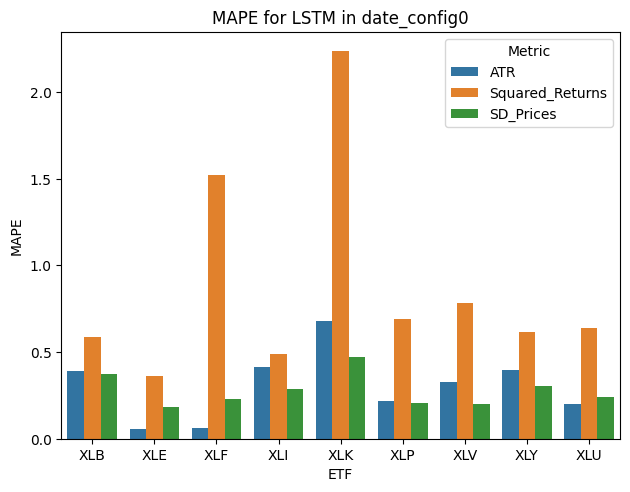

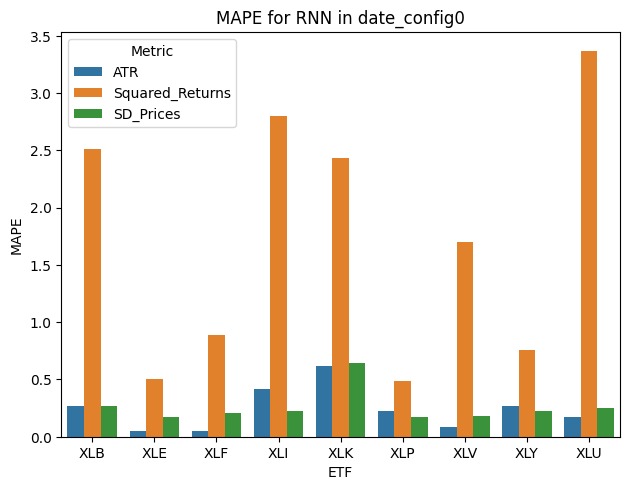

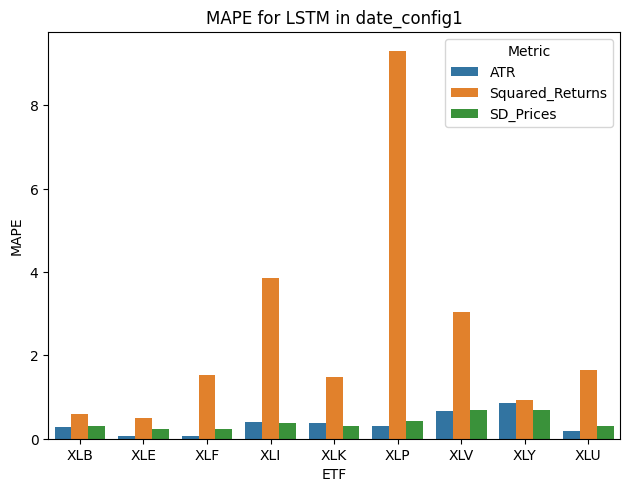

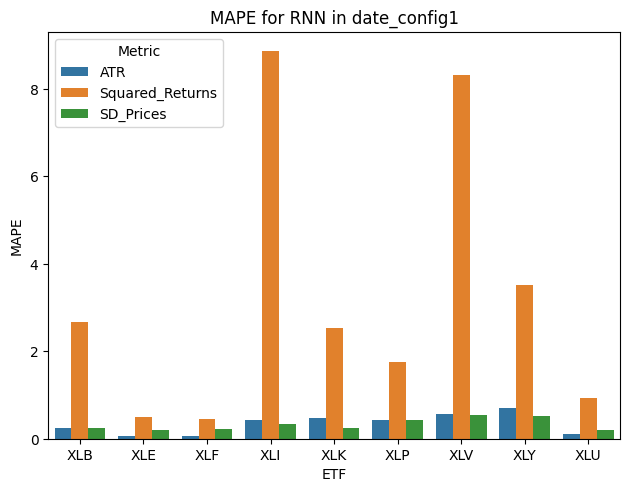

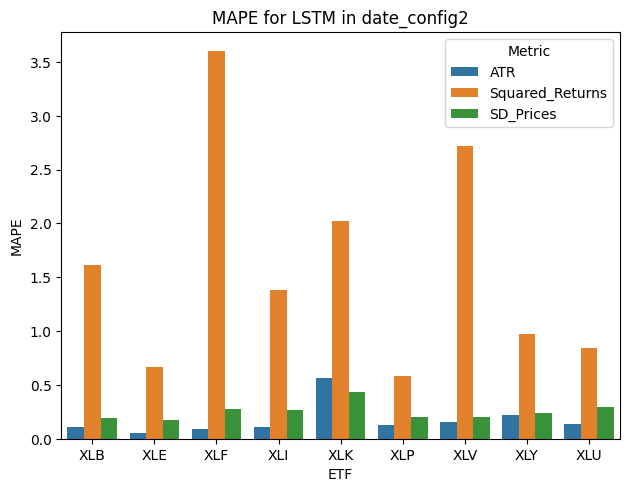

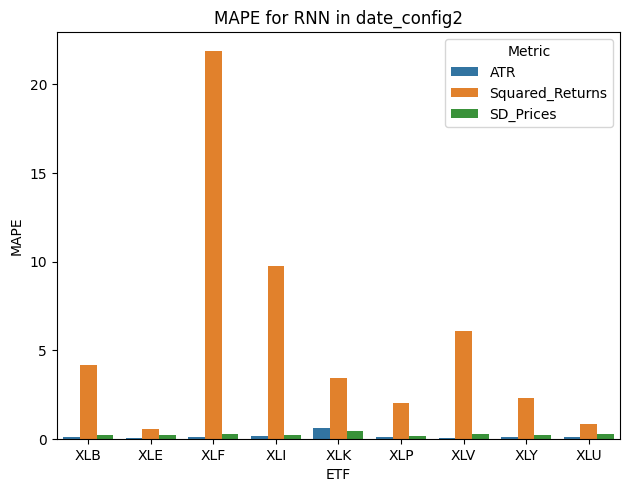

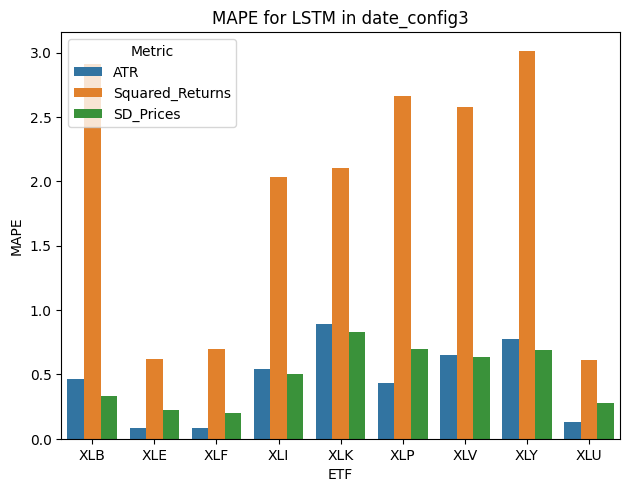

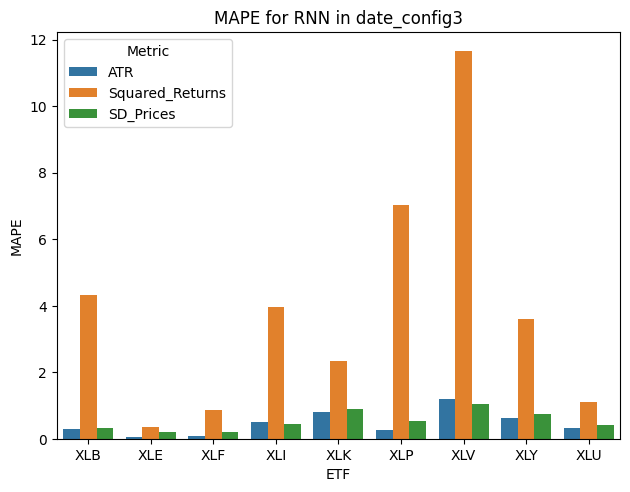

In [13]:
# show results
accuracy_metric = "MAPE"
for date,date_chunk in df_final.groupby("Date"): #returns (date_name,grouped section of df)
    for model,model_chunk in date_chunk.groupby("Model"):
        fig,ax = plt.subplots()
        sns.barplot(model_chunk,x="ETF",y=accuracy_metric,hue = "Metric", ax = ax)
        fig.tight_layout()
        ax.set_title(f"{accuracy_metric} for {model} in {date}")
        fig.savefig(fname=f"../output/analysis/{accuracy_metric}_{date}_{model}")

In [ ]:
#Analyze final runs
df_final = pd.DataFrame()
num = 10037
root = f"../output/runtest_{num}"
for date in os.listdir(path=root):
    for model in os.listdir(path=os.path.join(root,date)): 
       df = pd.read_csv(os.path.join(root,date,model,'overall_results.csv'))
       df["Date"] = [date for _ in range(len(df))]
       df["Model"] = [model for _  in range(len(df))]
       #print(df)#.groupby("Metric")[["Relative_MSE","MAPE"]].mean()) 
       df_final = pd.concat((df_final,df),axis=0)
df_final.groupby(["ETF","Metric"])["Final_Value"].mean()

ETF  Metric         
XLB  ATR                 913.826564
     SD_Prices           993.963636
     Squared_Returns     981.832924
XLE  ATR                 991.573045
     SD_Prices           990.781411
     Squared_Returns     970.036836
XLF  ATR                1030.194206
     SD_Prices           948.620398
     Squared_Returns    1006.137022
XLI  ATR                1027.247509
     SD_Prices           941.310709
     Squared_Returns    1037.584079
XLK  ATR                1065.867263
     SD_Prices          1037.503361
     Squared_Returns    1000.964977
XLP  ATR                 929.664640
     SD_Prices          1023.678575
     Squared_Returns     984.771617
XLU  ATR                 903.079193
     SD_Prices           892.311590
     Squared_Returns     991.707127
XLV  ATR                 963.708353
     SD_Prices          1014.724489
     Squared_Returns     959.189584
XLY  ATR                1075.827379
     SD_Prices          1044.785537
     Squared_Returns    1077.382549
Name: F

<Axes: xlabel='ETF', ylabel='Final_Value'>

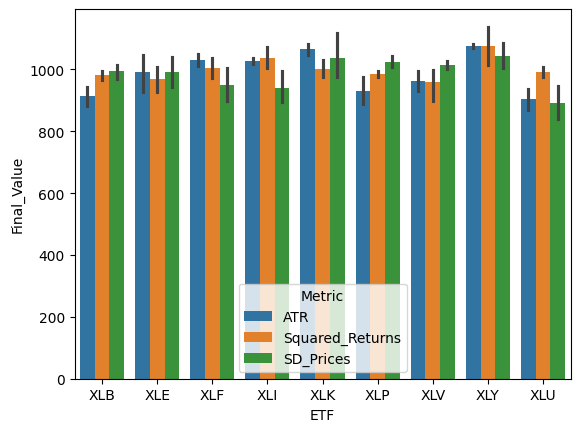

In [8]:
sns.barplot(df_final,x="ETF",y="Final_Value",hue="Metric")

In [ ]:
#take corr between simulation and 